In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import os
from bokeh.plotting import figure, show

df = pd.read_csv("data/insurance.csv")

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
'''So basically what the labelencoder does is to turn the values from categorical values into numerical 
values such as 0 ,1 etc'''
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#Sex Male or Female
encoder.fit(df.sex.drop_duplicates())
df.sex = encoder.transform(df.sex)

# smoker or not
encoder.fit(df.smoker.drop_duplicates()) 
df.smoker = encoder.transform(df.smoker)

#region
encoder.fit(df.region.drop_duplicates()) 
df.region = encoder.transform(df.region)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [5]:
df.corr()["charges"] #Checking correlation between columns

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

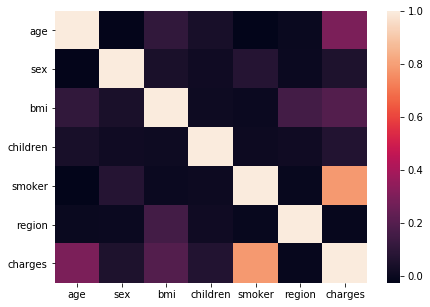

In [6]:
corr = df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr)
plt.show()


In [7]:
'''As we can see there is a correlation between the charges and if the person is a smoker '''

'As we can see there is a correlation between the charges and if the person is a smoker '

Text(0.5,1,'Distribution of charges for non-smokers')

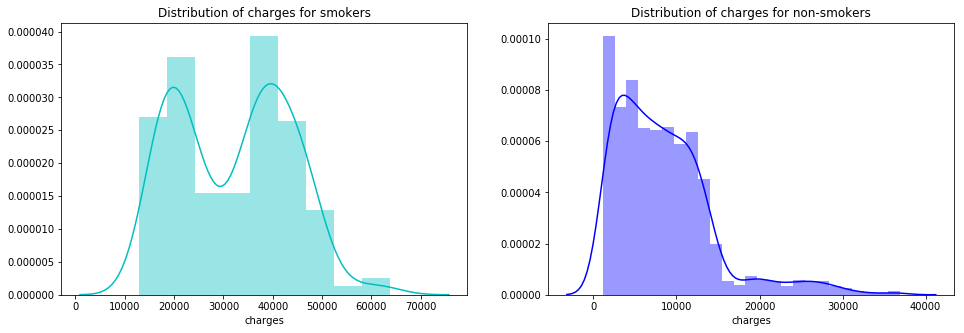

In [8]:
f = plt.figure(figsize=(16,5))

ax = f.add_subplot(121) 
sns.distplot(df[(df.smoker==1)]["charges"], color ="c", ax = ax) 
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122) 
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax) 
ax.set_title('Distribution of charges for non-smokers')

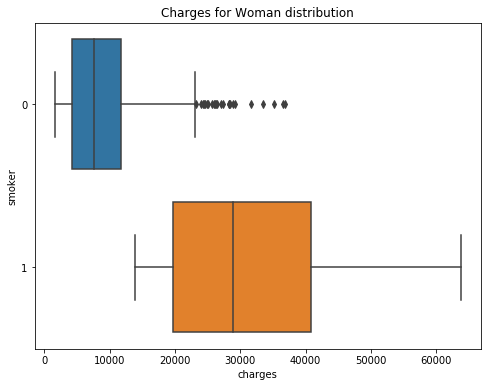

In [9]:
plt.figure(figsize=(8,6))
plt.title("Charges for Woman distribution")
sns.boxplot(y="smoker",x="charges" , data=df[(df.sex==0)], orient="h")

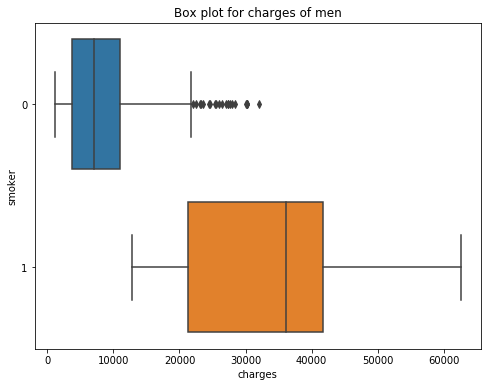

In [10]:
plt.figure(figsize=(8,6))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h")

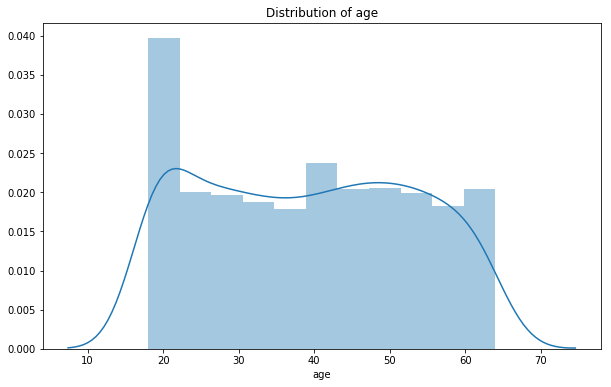

In [11]:
plt.figure(figsize=(10,6))
plt.title('Distribution of age')
ax = sns.distplot(df['age'])

In [12]:
'''So this distplot shows the age of the people who has insurance. As we can see there is more people who has insurance 
in the age of 18-20 years old'''

'So this distplot shows the age of the people who has insurance. As we can see there is more people who has insurance \nin the age of 18-20 years old'

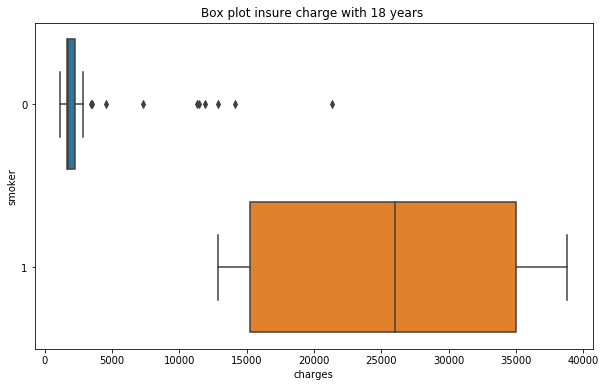

In [13]:
plt.figure(figsize=(10,6))
plt.title("Box plot insure charge with 18 years ")
sns.boxplot(y="smoker", x="charges", data =  df[(df.age == 18)], orient="h")

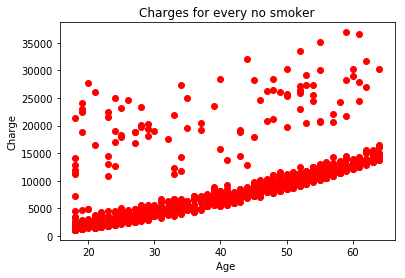

In [14]:
#x = df[df['smoker'] == 'no']['age']
#y = df[df['smoker']== 'no']['charges']

plt.scatter(x = df[df['smoker'] == 0]['age'], y = df[df['smoker'] == 0]['charges'], color='red')
plt.title('Charges for every no smoker')
plt.xlabel('Age ')
plt.ylabel('Charge')
plt.show()


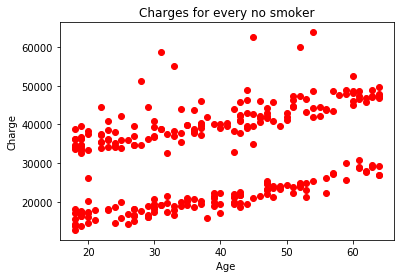

In [15]:
plt.scatter(x = df[df['smoker'] == 1]['age'], y = df[df['smoker']== 1]['charges'], color='red')
plt.title('Charges for every no smoker')
plt.xlabel('Age ')
plt.ylabel('Charge')
plt.show()

In [16]:
#Bokeh
'''p = figure(plot_width=500, plot_height=450)
p.circle(x=df[(df.smoker == 0)].age,y=df[(df.smoker == 0)].charges, size=7, fill_color="red", fill_alpha=0.9)

show(p)'''


'p = figure(plot_width=500, plot_height=450)\np.circle(x=df[(df.smoker == 0)].age,y=df[(df.smoker == 0)].charges, size=7, fill_color="red", fill_alpha=0.9)\n\nshow(p)'

C:\Users\Chenge\Anaconda3\envs\ztdl\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5,1,'Smokers and non-smokers')

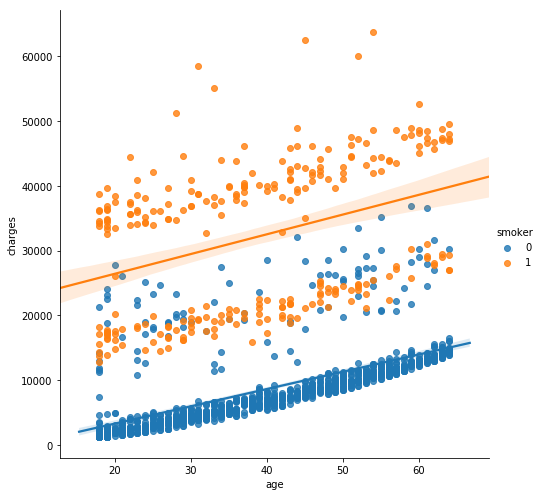

In [17]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, size = 7)
ax.set_title('Smokers and non-smokers')

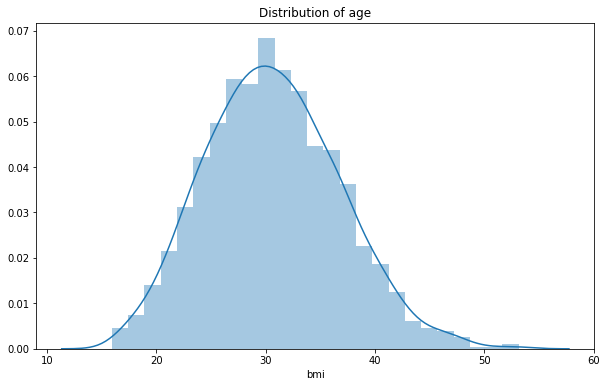

In [18]:
plt.figure(figsize=(10,6))
plt.title('Distribution of age')
ax = sns.distplot(df['bmi'])

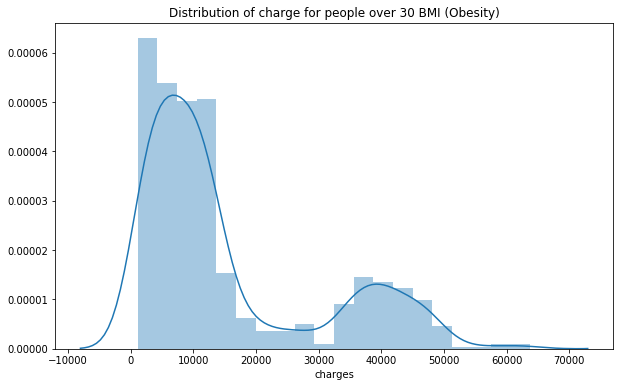

In [19]:
plt.figure(figsize=(10,6))
plt.title("Distribution of charge for people over 30 BMI (Obesity)")
sns.distplot(df[(df.bmi > 30)]["charges"])

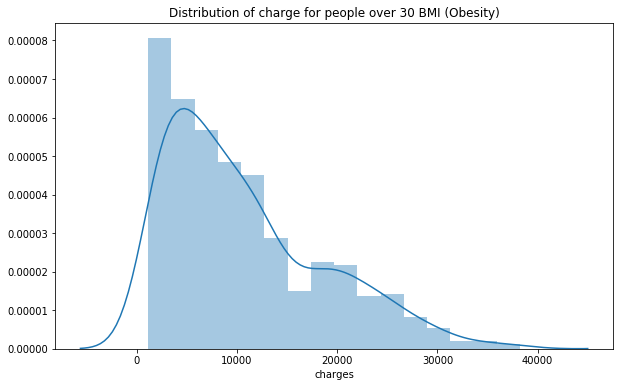

In [20]:
plt.figure(figsize=(10,6))
plt.title("Distribution of charge for people over 30 BMI (Obesity)")
sns.distplot(df[(df.bmi < 30)]["charges"])

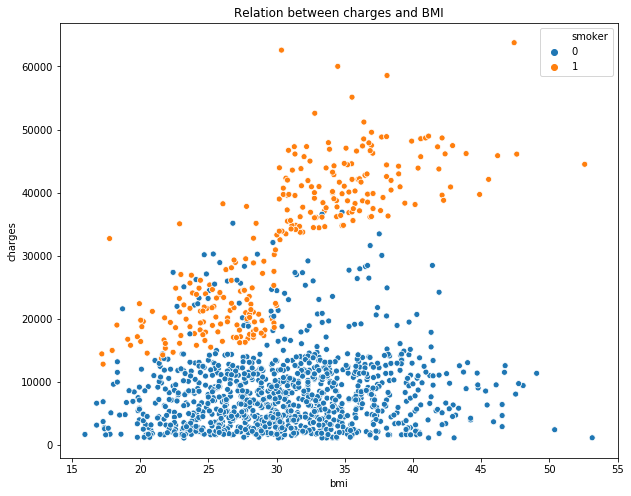

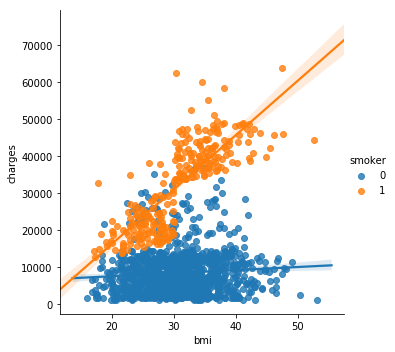

In [28]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df)
ax.set_title("Relation between charges and BMI")



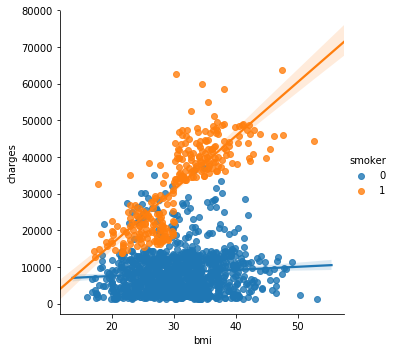

In [27]:
plt.figure(figsize=(30,20))
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [30]:
X=df.drop(["charges"], axis=1) #All the columns exept the charges
y=df.charges

In [34]:
x_train, x_test, y_train,y_test=train_test_split(X,y)
lr= LinearRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.775360382506


In [36]:
X = df.drop(['charges','region'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.884919734415
